# HK Model with Separable Landau Interaction

## $d = 1$

#### Imports

In [1]:
from HKLnumerics import HKLseparable_1D, PhaseDiagram_1D, PlotFunctions
import numpy as np

### Single Plot

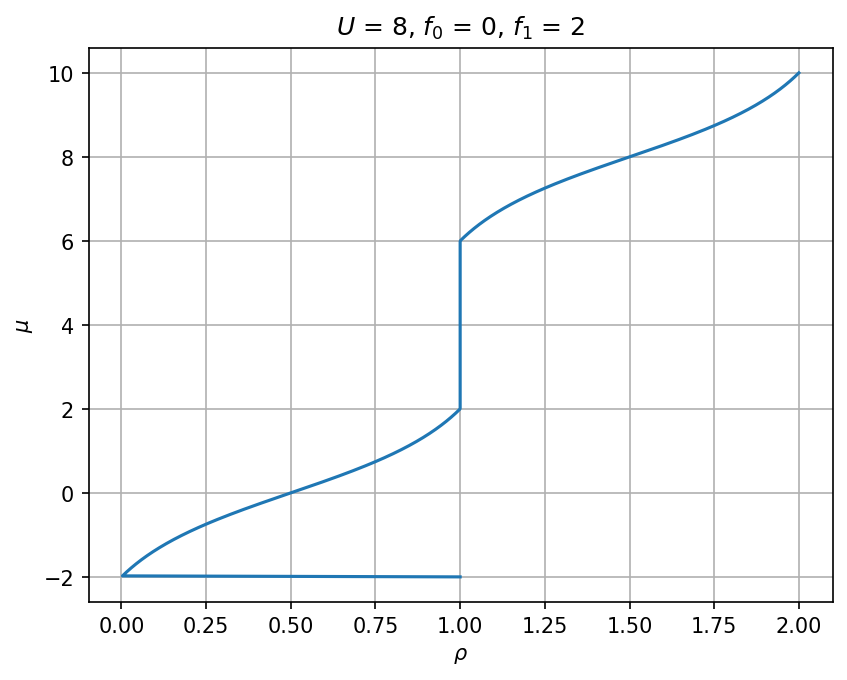

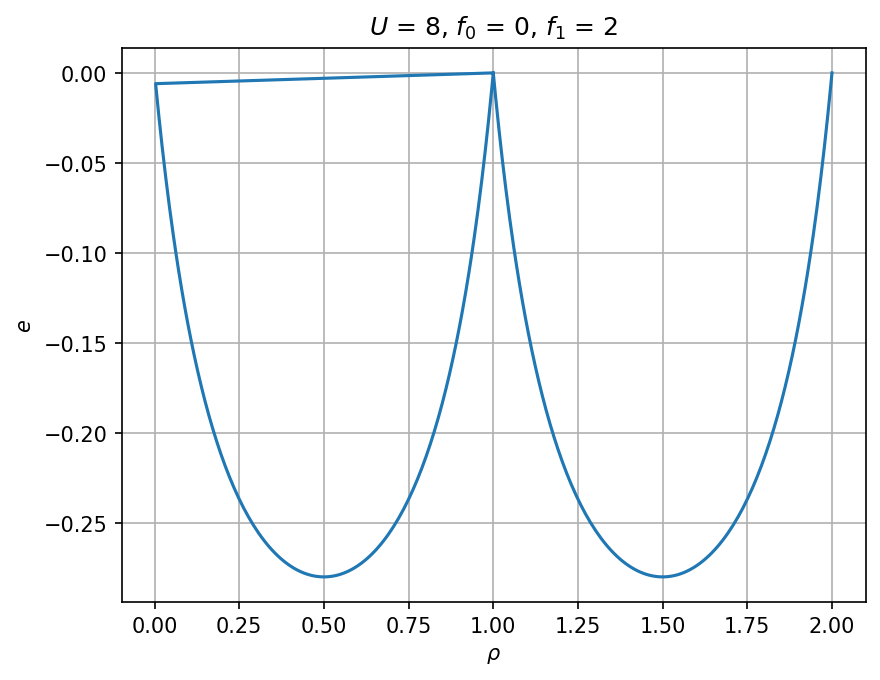

In [11]:
U = 8
f_0 = 0
f_1 = 2

f_0_str = r'$f_0$'
f_1_str = r'$f_1$'
U_str = r'$U$'

mu_array = HKLseparable_1D.create_mu_array(500, U, f_0)

rho_array_single_plot, e_array_single_plot = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, f_0, f_1)

PlotFunctions.one_plot(rho_array_single_plot, mu_array, r'$\rho$', r'$\mu$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')
PlotFunctions.one_plot(rho_array_single_plot, e_array_single_plot, r'$\rho$', r'$e$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')

#### Energy Density

Progress: 99.8%                    

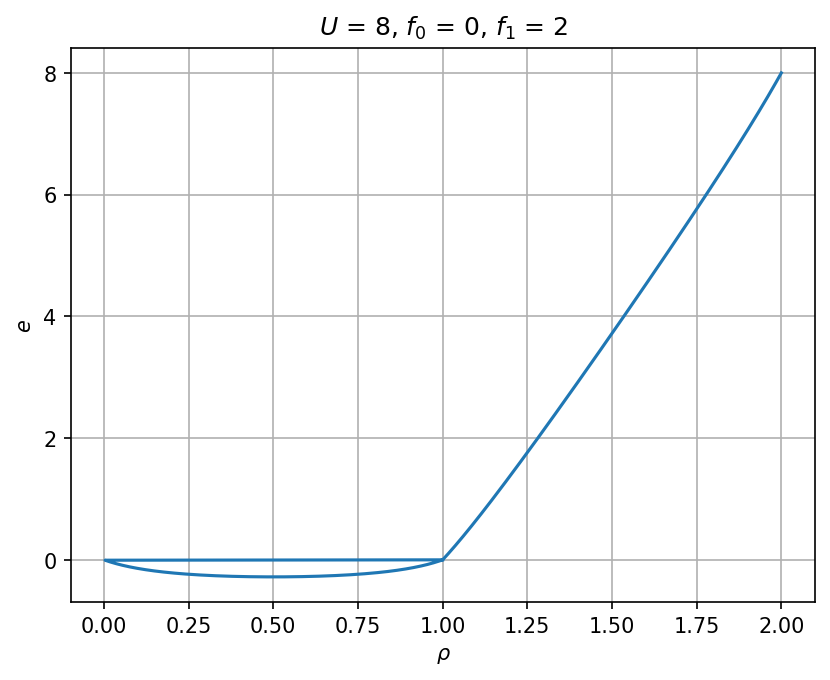

In [12]:
energy_array_single_plot = HKLseparable_1D.create_energy_array(mu_array, rho_array_single_plot, e_array_single_plot, U, f_0, f_1)
PlotFunctions.one_plot(rho_array_single_plot, energy_array_single_plot, r'$\rho$', r'$e$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')

### $U = const.$, Investigate effect of $f_1$

In [44]:
U_1d_f1 = 6
f1s_1d = [0, 0.5, 1, 2]
N = 5000


str_f_1 = r'$f_1 / t$'
f1_1d_labels = []
rhos_1d_f1s = []
mus_1d_f1s_list = []
es_1d_f1s = []


mu_2d_f1s = HKLseparable_1D.create_mu_array(N, U_1d_f1, 0)

for f_1_val in f1s_1d:
    f1_1d_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_1d_f1, 0, f_1_val)

    rhos_1d_f1s.append(rho_arr_f1[1:])
    es_1d_f1s.append(e_arr_f1[1:])
    mus_1d_f1s_list.append(mu_2d_f1s[1:])

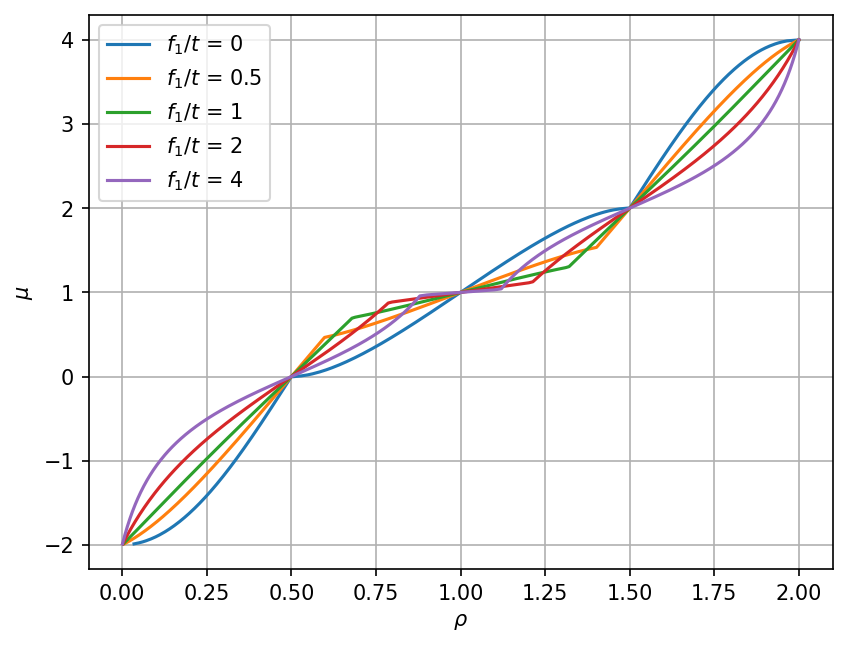

In [14]:
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, mus_1d_f1s_list, r'$\rho$', r'$\mu$')

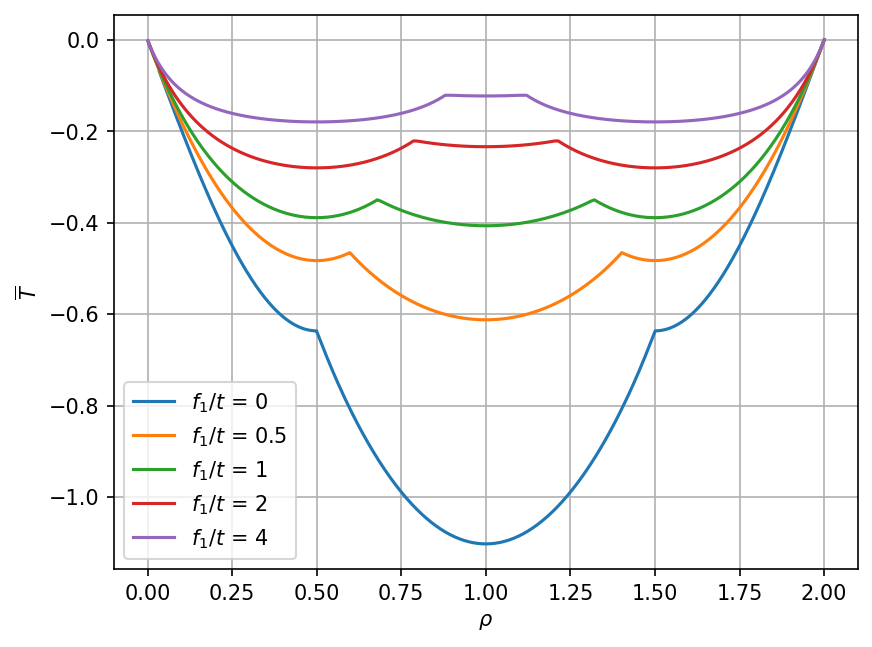

In [18]:
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, es_1d_f1s, r'$\rho$', r'$\overline{T}$')

In [29]:
U_1d_f1_weak = 2
N = 5000

rhos_1d_f1s_weak = []
mus_1d_f1s_list_weak = []
es_1d_f1s_weak = []


mu_2d_f1s_weak = HKLseparable_1D.create_mu_array(N, U_1d_f1_weak, 0)

for f_1_val in f1s_1d:
    rho_arr_f1, e_arr_f1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_2d_f1s_weak, U_1d_f1_weak, 0, f_1_val)

    rhos_1d_f1s_weak.append(rho_arr_f1[1:])
    es_1d_f1s_weak.append(e_arr_f1[1:])
    mus_1d_f1s_list_weak.append(mu_2d_f1s_weak[1:])

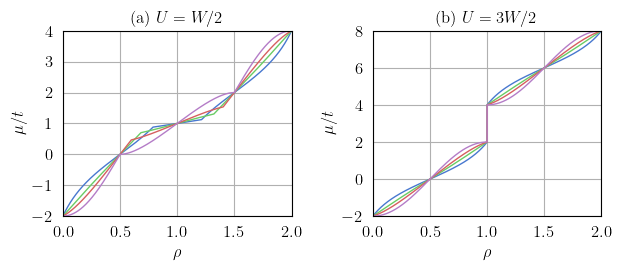

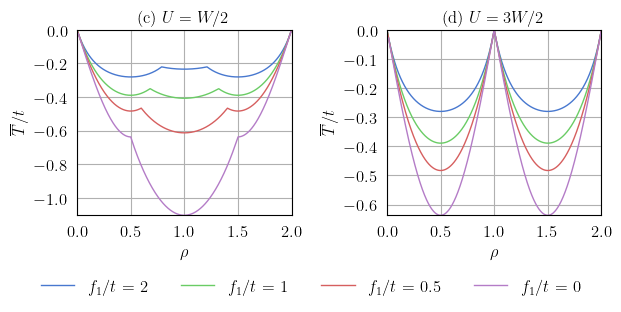

In [46]:
import matplotlib.pyplot as plt
import importlib
importlib.reload(PlotFunctions)

plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [mus_1d_f1s_list_weak, mus_1d_f1s_list],
                                               r'$\rho$', r'$\mu / t$', [r'(a) $U=W/2$', r'(b) $U=3W/2$'], ylimits=[0.005, 0.005], yticks=[1, 2], legend=False,
                                               save_title='Plots/HKLseperable_mu_1d_many_f1.pdf')

PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [es_1d_f1s_weak, es_1d_f1s],
                                               r'$\rho$', r'$\overline{T}/t$', [r'(c) $U=W/2$', r'(d) $U=3W/2$'], ylimits=[0, 0], yticks=[0.2, 0.1], 
                                               save_title='Plots/HKLseperable_Tbar_1d_many_f1.pdf')

### $f_1 = const$, investigate how different $U$ are affected

In [15]:
f_1 = 0.5
N = 500

U_vals = [1, 2, 3, 4]

f_1_str = r'$f_1$'
rhos_U = []
es_U = []
mus_U = []
labels_U = []

for U_val in U_vals:
    mu_U_val = HKLseparable_1D.create_mu_array(N, U_val, 0)
    rho_U_val, e_U_val = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U_val, U_val, 0, f_1)

    labels_U.append(f'U = {U_val}')
    rhos_U.append(rho_U_val)
    es_U.append(e_U_val)
    mus_U.append(mu_U_val)

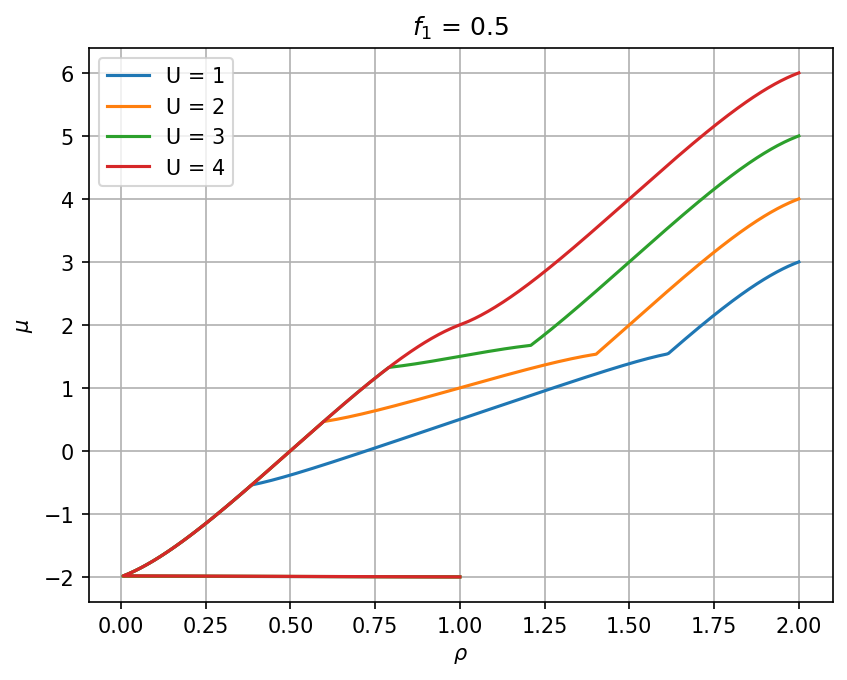

In [16]:
PlotFunctions.many_plots(labels_U, rhos_U, mus_U, r'$\rho$', r'$\mu$', title=f'{f_1_str} = {f_1}')

Second phase transition no longer at constant mu because band width is renormalized, energy of highest occupied state varies

### Phase Diagram

In [87]:
importlib.reload(PhaseDiagram_1D)

f1s_pd_1d = [0, 1, 2, 4, 8]
N = 1000

Ucs_1d =[]
pd_rhos_1d = []
pd_labels = []
str_f_1 = r'$f_1 / t$'

for f1_val in f1s_pd_1d:
    print(f'f1 = {f1_val}')
    Uc_f1, rho_f1 = PhaseDiagram_1D.phase_diagram_landau(N, f1_val)

    pd_labels.append(f'{str_f_1} = {f1_val}')
    Ucs_1d.append(Uc_f1)
    pd_rhos_1d.append(rho_f1)
    print('\n')

pd_rhos_1d[0] -= 1

for U_arr in Ucs_1d:
    U_arr /= np.max(U_arr)


f1 = 0
Progress: 99.9%                    

f1 = 1
Progress: 99.9%                    

f1 = 2
Progress: 99.9%                    

f1 = 4
Progress: 0.1%                    Warning: Root finding failed at 1-th point!
Progress: 0.3%                    Warning: Root finding failed at 3-th point!
Progress: 99.9%                    

f1 = 8
Progress: 0.1%                    Warning: Root finding failed at 1-th point!
Progress: 0.2%                    Warning: Root finding failed at 2-th point!
Progress: 0.3%                    Warning: Root finding failed at 3-th point!
Progress: 0.5%                    Warning: Root finding failed at 5-th point!
Progress: 0.7%                    Warning: Root finding failed at 7-th point!
Progress: 0.8%                    Warning: Root finding failed at 8-th point!
Progress: 0.9%                    Warning: Root finding failed at 9-th point!
Progress: 1.0%                    Warning: Root finding failed at 10-th point!
Progress: 10.5%                    W

Canvas size (set)     : 4.252 in x 3.280 in = 10.80 cm x 8.33 cm
Tight bbox (rendered)  : 5.10718 in x 3.03129 in = 12.97 cm x 7.70 cm


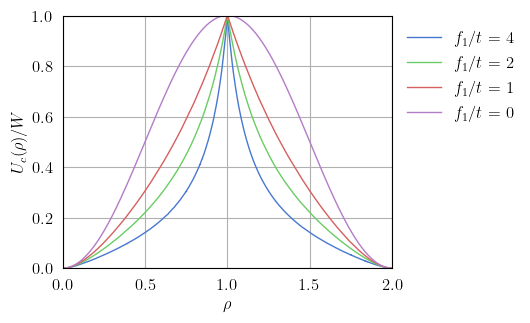

In [98]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_singleplot_multiple_lines(pd_labels, pd_rhos_1d[:-1], Ucs_1d[:-1], r'$\rho$', r'$U_c(\rho)/W$', yticks=0.2, save_title='Plots/U_C_HKL_1d.pdf')

Seems that in the limit $f_1 \rightarrow \infty$, $U_c$ converges to
\begin{equation}
    U_c = \begin{cases}
                4td \quad &\rho = 1 \\
                0 \quad &\text{else}
            \end{cases}
\end{equation}
Interesting because phase I disappears?

## $d = 2$

### Imports

In [5]:
from HKLnumerics import HKLseparable_2D, PlotFunctions, PhaseDiagram_2D
import numpy as np

### Chemical Potential

In [25]:
U_one = 8
f_1_one = 4

mu_2d_U_one = HKLseparable_2D.create_mu_array(100, U_one, 0)

rho_2d_U_one, e_2d_U_one = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_U_one, U_one, 0, f_1_one)

Progress: 100.0%                    

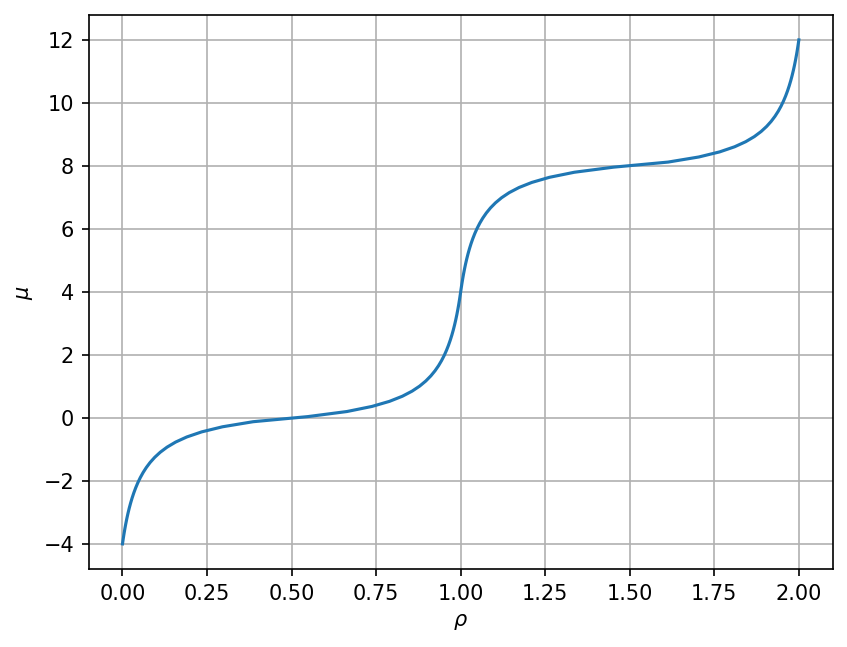

In [26]:
PlotFunctions.one_plot(rho_2d_U_one, mu_2d_U_one, r'$\rho$', r'$\mu$')

### Fix $U$, investigate effect of $f_1$

In [40]:
U_2d_f1 = 12
f1s_2d = [0, 2, 4]
N = 100


str_f_1 = r'$f_1$'
f_1_labels = []
rhos_2d_f1s = []
mus_2d_f1s_list = []
es_2d_f1s = []


mu_2d_f1s = HKLseparable_2D.create_mu_array(N, U_2d_f1, 0)

for f_1_val in f1s_2d:
    print(f'\nf_1 = {f_1_val}')

    f_1_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_2d_f1, 0, f_1_val)

    rhos_2d_f1s.append(rho_arr_f1)
    es_2d_f1s.append(e_arr_f1)
    mus_2d_f1s_list.append(mu_2d_f1s)




f_1 = 0
Progress: 100.0%                    
f_1 = 2
Progress: 100.0%                    
f_1 = 4
Progress: 100.0%                    

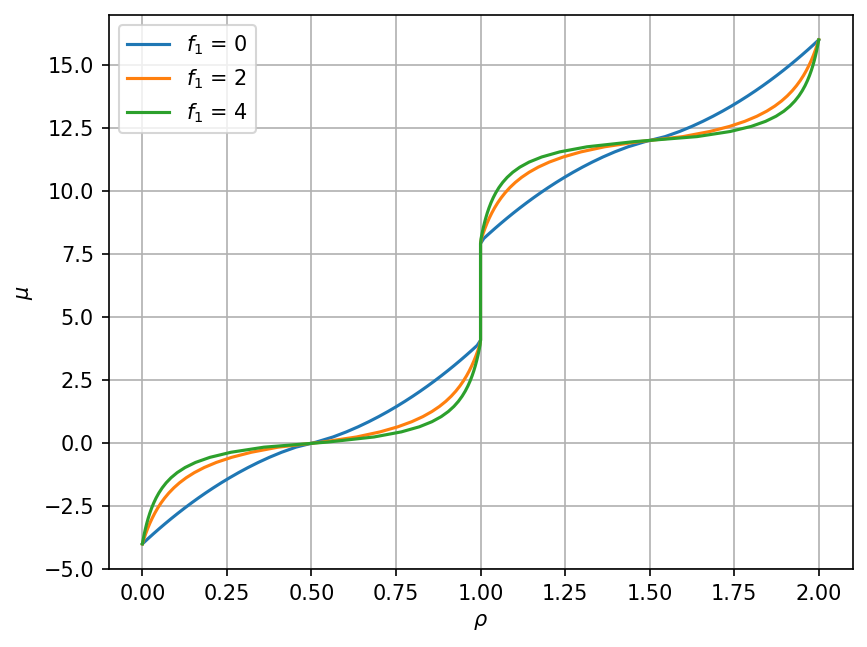

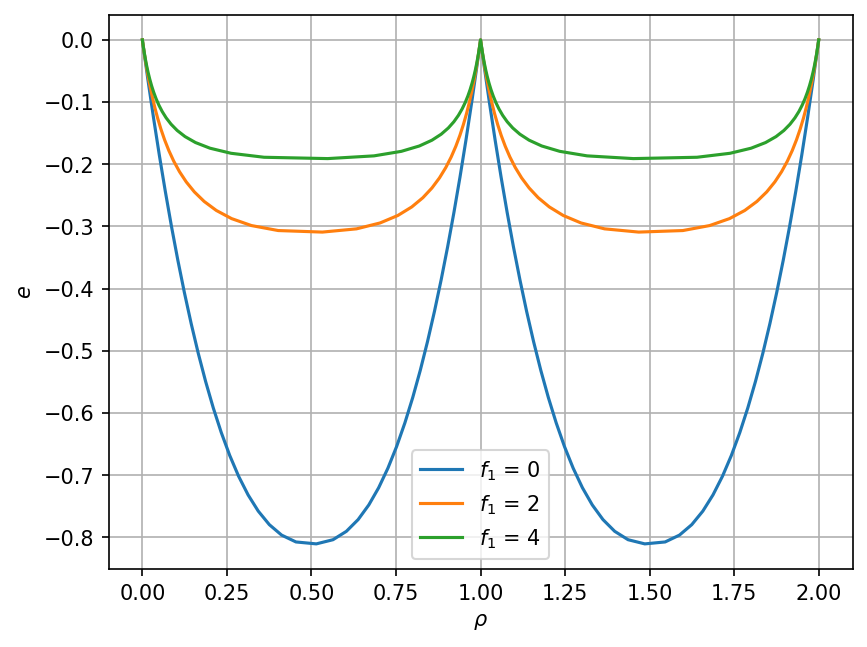

In [41]:
PlotFunctions.many_plots(f_1_labels, rhos_2d_f1s, mus_2d_f1s_list, r'$\rho$', r'$\mu$')
PlotFunctions.many_plots(f_1_labels, rhos_2d_f1s, es_2d_f1s, r'$\rho$', r'$e$')

### Phase Diagram

In [35]:
f1s_pd_2d = [0, 1, 2]
N = 100

Ucs_2d =[]
pd_rhos_2d = []
pd_labels_2d = []
str_f_1 = r'$f_1$'

for f1_val in f1s_pd_2d:
    print(f'f1 = {f1_val}')
    Uc_f1, rho_f1 = PhaseDiagram_2D.phase_diagram_landau(N, f1_val)

    pd_labels_2d.append(f'{str_f_1} = {f1_val}')
    Ucs_2d.append(Uc_f1)
    pd_rhos_2d.append(rho_f1)
    print('\n')

f1 = 0
Progress: 100.0%                    

f1 = 1
Progress: 100.0%                    

f1 = 2
Progress: 100.0%                    



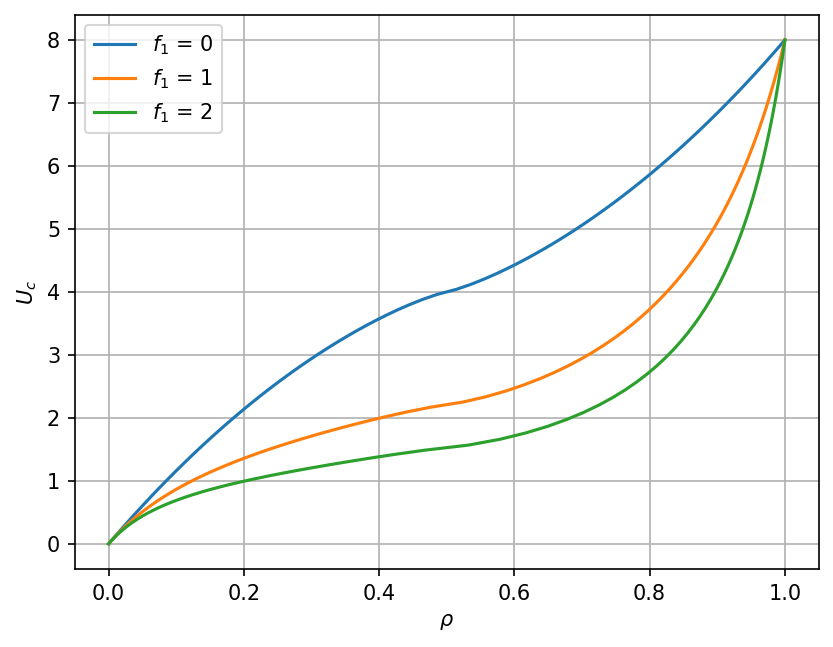

In [36]:
PlotFunctions.many_plots(pd_labels_2d, pd_rhos_2d, Ucs_2d, r'$\rho$', r'$U_c$')

## $d=3$

### Imports

In [2]:
from HKLnumerics import HKLseparable_3D, PlotFunctions
import numpy as np

In [4]:
print(np.__version__)

2.2.5


In [3]:
U_3d_one = 16
f_1_3d_one = 4

mu_3d_U_one = HKLseparable_3D.create_mu_array(100, U_3d_one, 0)

rho_3d_U_one, e_3d_U_one = HKLseparable_3D.create_solution_arrays_rho_e_root(mu_3d_U_one, U_3d_one, 0, f_1_3d_one)

Progress: 0.0%                    

/Users/marieheinrich/Desktop/Hatsugai-Kohmoto-Landau/HKLnumerics/HKLseparable_3D.py:37: RuntimeWarning: invalid value encountered in sqrt
  - 1 / (np.pi * np.sqrt(np.square(2 * t * y) - np.square(x))),


Progress: 4.0%                    

KeyboardInterrupt: 

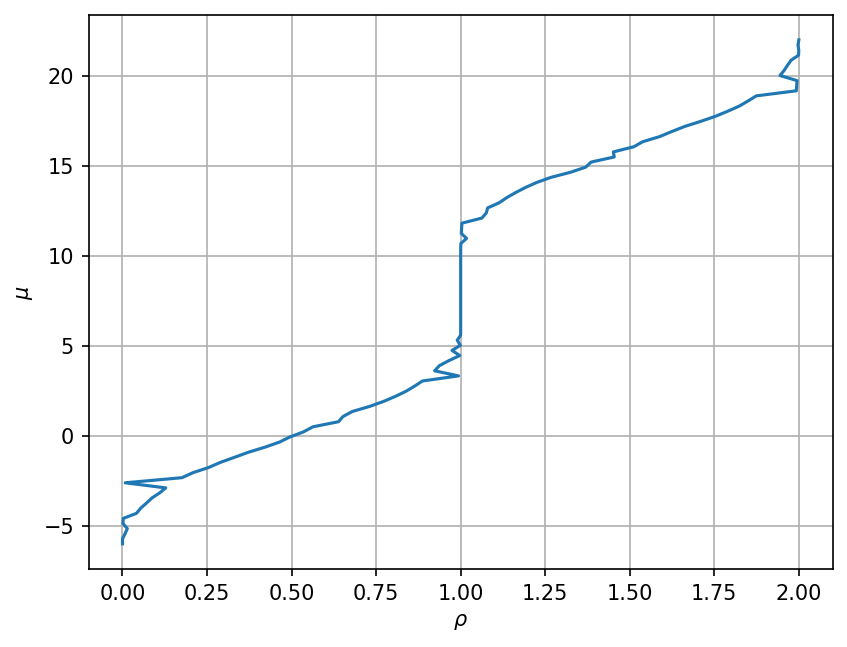

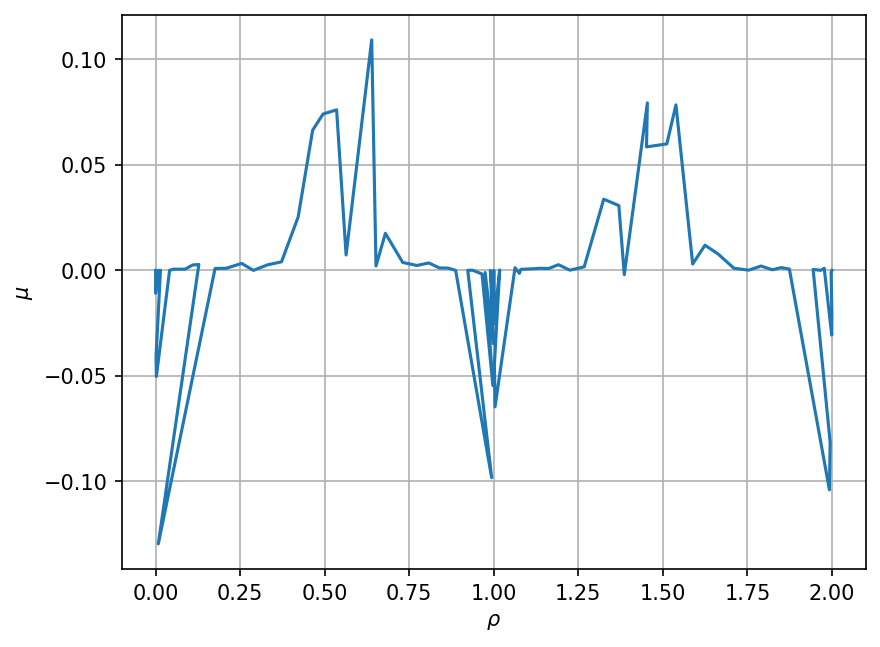

In [3]:
PlotFunctions.one_plot(rho_3d_U_one, mu_3d_U_one, r'$\rho$', r'$\mu$')
PlotFunctions.one_plot(rho_3d_U_one, e_3d_U_one, r'$\rho$', r'$\mu$')

In [6]:
U_3d_f1 = 16
f1s_3d = [0, 4]
N = 100


str_f_1 = r'$f_1$'
f_1_labels = []
rhos_3d_f1s = []
mus_3d_f1s_list = []
es_3d_f1s = []


mu_3d_f1s = HKLseparable_3D.create_mu_array(N, U_3d_f1, 0)

for f_1_val in f1s_3d:
    print(f'\nf_1 = {f_1_val}')

    f_1_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_3D.create_solution_arrays_rho_e_root(mu_3d_f1s, U_3d_f1, 0, f_1_val)

    rhos_3d_f1s.append(rho_arr_f1)
    es_3d_f1s.append(e_arr_f1)
    mus_3d_f1s_list.append(mu_3d_f1s)


f_1 = 0
Progress: 99.0%                    

/Users/marieheinrich/Desktop/Hatsugai-Kohmoto-Landau/HKLnumerics/HKLseparable_3D.py:37: RuntimeWarning: divide by zero encountered in divide
  - 1 / (np.pi * np.sqrt(np.square(2 * t * y) - np.square(x))),


Progress: 100.0%                    
f_1 = 4
Progress: 100.0%                    

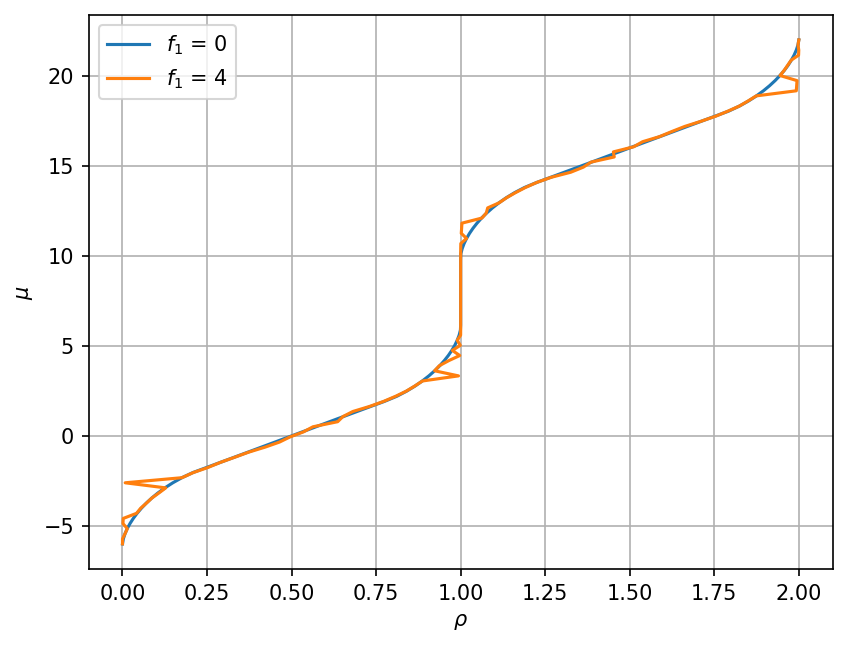

In [7]:
PlotFunctions.many_plots(f_1_labels, rhos_3d_f1s, mus_3d_f1s_list, r'$\rho$', r'$\mu$')